In [101]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

%matplotlib inline

In [102]:
#1. Load raw data
cp = pd.read_csv('marketing_campaign.csv')


In [103]:
#2. Exploratory Data Analysis
cp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [104]:
cp.shape #good sample size

(2240, 29)

In [105]:
cp.index.duplicated().shape

(2240,)

In [106]:
cp.columns #To clean column names for easier use

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [107]:
cp.columns = cp.columns.str.lower()
cp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [108]:
cp.dtypes #Dt_Customer is currently an Object that should be converted to date format

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [109]:
cp['dt_customer'] = pd.to_datetime(cp['dt_customer'], format=None)

In [110]:
cp['dt_customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

In [111]:
cp.marital_status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

In [112]:
cp.isnull().sum() #To investigate missing values

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [113]:
cp[cp['income'].isnull()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


In [114]:
cp.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [115]:
#Replacing missing income value with quantile 50% value
cp['income'] = cp['income'].fillna(cp['income'].quantile(q=0.5))

In [116]:
cp['income'].isnull().sum()

0

In [117]:
cp.income.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [118]:
cp[cp['income']>78522]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,2,0,0,1,0,0,0,3,11,0
40,8601,1980,Graduation,Married,80011.0,0,1,2013-04-29,3,421,...,4,0,0,0,0,0,0,3,11,0
45,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,1,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,2012-11-08,2,650,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-06-11,38,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-05-02,42,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-12-10,42,594,...,2,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-05-04,54,332,...,1,0,0,0,0,0,0,3,11,0


In [119]:
cp[cp['income']==666666.0] #Data looks to be normal with possible invalid value of income so we'll drop this

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [120]:
cp = cp.drop(labels=2233, axis=0)

In [121]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2239.0,5590.444841,3246.372471,0.0,2827.5,5455.0,8423.5,11191.0
year_birth,2239.0,1968.802144,11.985494,1893.0,1959.0,1970.0,1977.0,1996.0
income,2239.0,51963.554712,21410.672116,1730.0,35533.5,51381.5,68277.5,162397.0
kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
mntwines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
mntfruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
mntmeatproducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
mntfishproducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0


In [60]:
#To check columns with NaN value

In [122]:
cp['z_costcontact'].value_counts()

3    2239
Name: z_costcontact, dtype: int64

In [123]:
cp['z_revenue'].value_counts()

11    2239
Name: z_revenue, dtype: int64

In [124]:
#Column z_costcontact and z_revenue contain invalid value so we'll drop them both

cp = cp.drop(labels=['z_costcontact', 'z_revenue'], axis=1)

In [125]:
cp.year_birth.describe()

count    2239.000000
mean     1968.802144
std        11.985494
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64

In [126]:
cp[cp['year_birth'] < 1940] #year of birth of these 3 customer seemed to be an error, we'll drop them out too

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0


In [127]:
cp = cp.drop(labels=192, axis=0)

In [128]:
cp = cp.drop(labels=239, axis=0)

In [129]:
cp = cp.drop(labels=339, axis=0)

In [130]:
cp = cp.drop(labels=['id'], axis=1)

In [131]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
year_birth,2236.0,1968.898032,11.703281,1940.0,1959.0,1970.0,1977.00,1996.0
income,2236.0,51952.614043,21411.466851,1730.0,35502.5,51381.5,68275.75,162397.0
kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0
teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0
recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
mntwines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
mntfruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
mntmeatproducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
mntfishproducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
mntsweetproducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0


In [ ]:
#Now we'll look at correlation of customer behavior by dropping the campaign data out

In [132]:
cp1 = cp.drop(labels=['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'], axis=1)
cp1.corr()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response
year_birth,1.000000,-0.198835,0.233894,-0.363172,-0.019396,-0.162809,-0.013657,-0.030729,-0.042359,-0.019379,-0.057419,-0.068286,-0.153873,-0.125285,-0.139237,0.117498,-0.004450,0.018557
income,-0.198835,1.000000,-0.510441,0.034315,0.007829,0.686080,0.504911,0.684176,0.518462,0.518126,0.383548,-0.107169,0.450584,0.693781,0.628075,-0.646382,-0.027871,0.161121
kidhome,0.233894,-0.510441,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,-0.370486,-0.349462,0.221489,-0.361982,-0.502331,-0.500192,0.447626,0.036336,-0.080005
teenhome,-0.363172,0.034315,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,-0.162527,-0.020447,0.388293,0.155649,-0.110551,0.050177,0.134636,0.007553,-0.154941
recency,-0.019396,0.007829,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,-0.198781
mntwines,-0.162809,0.686080,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,0.011173,0.542136,0.634716,0.642313,-0.320287,-0.035974,0.247280
mntfruits,-0.013657,0.504911,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,-0.131792,0.296986,0.487274,0.463136,-0.417405,-0.002813,0.125854
mntmeatproducts,-0.030729,0.684176,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,-0.122242,0.293502,0.723473,0.479983,-0.539183,-0.020750,0.236548
mntfishproducts,-0.042359,0.518462,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,-0.139263,0.293424,0.533969,0.459997,-0.445729,-0.018842,0.111325
mntsweetproducts,-0.019379,0.518126,-0.370486,-0.162527,0.022796,0.385845,0.567030,0.523329,0.579490,1.000000,0.369084,-0.120064,0.348236,0.490416,0.448673,-0.423215,-0.020432,0.117263


In [133]:
cp1['numwebpurchases'].mean()

4.087656529516995

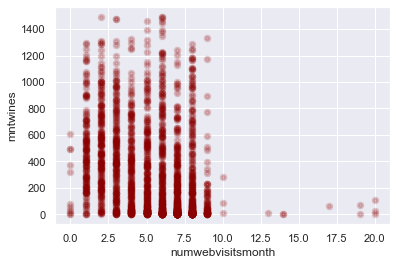

In [135]:
cp1.plot.scatter('numwebvisitsmonth','mntwines', linewidths = 3, alpha=0.2, c = 'darkred');

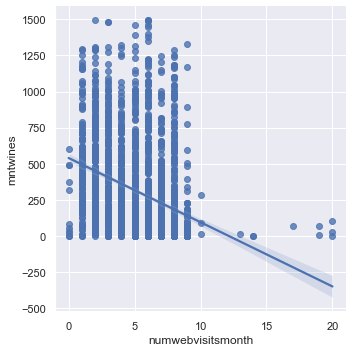

In [137]:
sns.lmplot(x='numwebvisitsmonth', y='mntwines', data=cp1);

<Figure size 720x360 with 0 Axes>

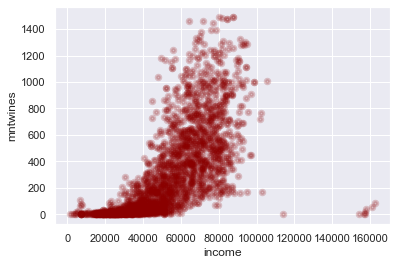

In [142]:
plt.figure(figsize=(10,5))
cp1.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c='darkred')

plt.savefig('income&wine')
plt.show()

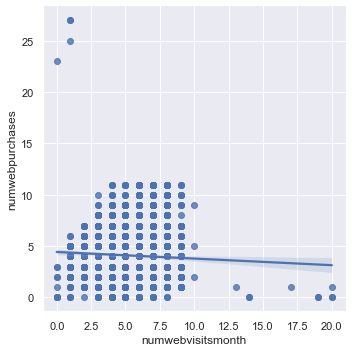

In [84]:
sns.lmplot(x='numwebvisitsmonth', y='numwebpurchases', data=cp1);

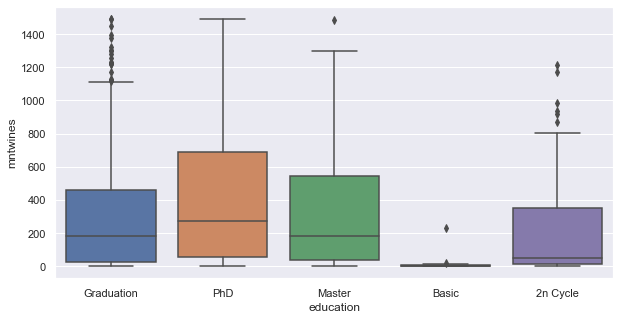

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='education', data=cp1)

plt.savefig('education&wine.png')
plt.show()

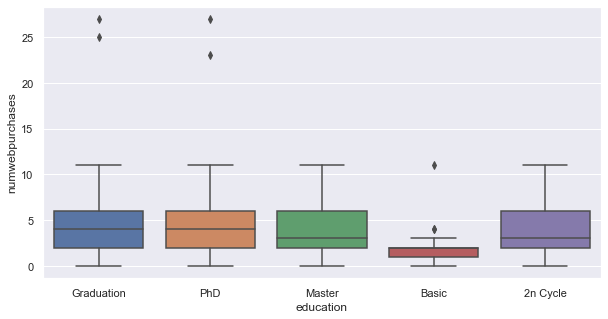

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='education', data=cp1)
plt.show()

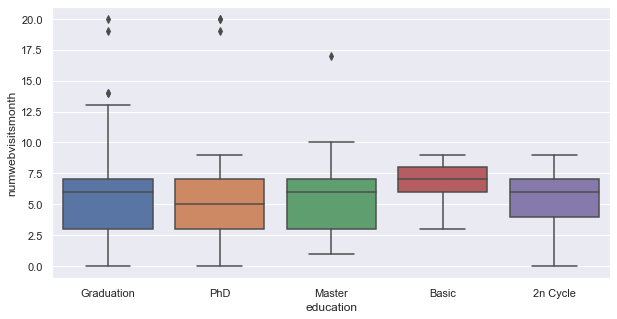

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebvisitsmonth', x='education', data=cp1)
plt.show()

In [89]:
cp1.columns

Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'response'],
      dtype='object')

In [143]:
#Now we'll only look at demographics of customer
cp2 = cp1.drop(labels = ['response','complain', 'numwebvisitsmonth', 'numstorepurchases', 'numcatalogpurchases', 'numwebpurchases', 'numdealspurchases', 'mntgoldprods', 'mntsweetproducts', 'mntfishproducts', 'mntmeatproducts', 'mntfruits'], axis=1)

In [144]:
#mntwines vs customer
cp2.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173


<AxesSubplot:>

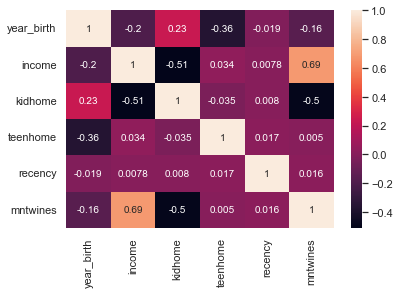

In [145]:
sns.heatmap(cp2.corr(), annot=True) #Customer with higher income spends more on wine

In [148]:
#This time we'll look at paring product that customer tend to buy with wine

#mntwines vs website activities
cp3 = cp1.drop(labels=['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency','numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'response', 'mntgoldprods'], axis=1)
cp3.head()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts
0,635,88,546,172,88
1,11,1,6,2,1
2,426,49,127,111,21
3,11,4,20,10,3
4,173,43,118,46,27


<AxesSubplot:>

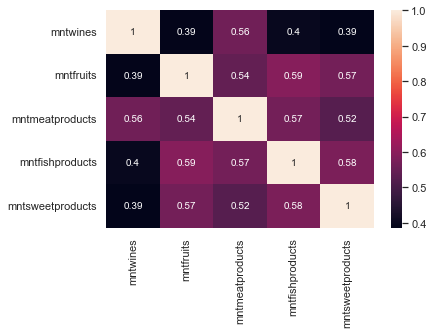

In [149]:
sns.heatmap(cp3.corr(), annot=True) #Meat products are the best paring product with wine

In [151]:
#Next we want to see which channel is the most popular to customer to purchase wine
#mntwines vs purchase channel
cp4 = cp.drop(labels = ['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods','numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'], axis=1)
cp4.head()

,mntwines,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases
0,635,3,8,10,4
1,11,2,1,1,2
2,426,1,8,2,10
3,11,2,2,0,4
4,173,5,5,3,6


<AxesSubplot:>

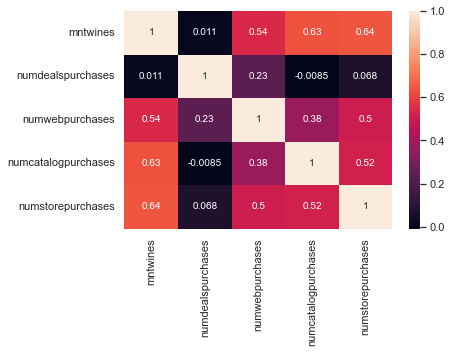

In [152]:
sns.heatmap(cp4.corr(), annot=True) #The amount of wine sold online is almost the same as amount sold through stores

In [ ]:
#Hypothesis Testing

In [182]:
#Define Hypothesis

# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "Web visits do not contribute to online sales"
    , 'H1': "Web visits contribute to online sales"
}

In [183]:
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [ ]:
#Collect Data

In [189]:
cp['numwebvisitsmonth'].describe()

count    2236.000000
mean        5.318873
std         2.426886
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: numwebvisitsmonth, dtype: float64

In [190]:
more = cp[cp['numwebvisitsmonth'] > 5]['numwebpurchases'].sample(1000, random_state=42)
less = cp[cp['numwebvisitsmonth'] <=5]['numwebpurchases'].sample(1000, random_state=42)

In [191]:
#Set alpha
alpha = 0.05

In [ ]:
#Calculate variance to get the standard deviation

In [192]:
more_var = more.var()
print(more_var)
less_var = less.var()
print(less_var)

8.37072972972973
7.158757757757758


In [193]:
#calculate Standard Deviation
std = np.sqrt((more_var + less_var)/2)
print('std dev: ', std)

std dev:  2.7865289777326456


In [194]:
#calculate test statistic
t = (more.mean() - less.mean()) / (std*np.sqrt(2/N))
print('t: ', t) #T-statistic

t:  -3.434513339059681


In [ ]:
#Find the p-value
#Compare witht the t-value

In [195]:
#calculate degree of freedom
df = 2*N-2
df

1998

In [196]:
#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)
    
print("t = " + str(t))
print("p = " + str(2*p))

t = -3.434513339059681
p = 0.0006057394363318865


In [ ]:
#Interpret the results

In [197]:
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = -3.434513339059681
p = 0.0006057394363318865
We reject our null hypothesis.
Web visits contribute to online sales


In [198]:
#Hypothesis with mntwines, check it on a smaller sample size
#Calculate variance
N = 500
high = cp[cp['numwebvisitsmonth'] > 5]['mntwines'].sample(500, random_state=42)
low = cp[cp['numwebvisitsmonth'] <=5]['mntwines'].sample(500, random_state=42)

In [199]:
high_var = high.var()
print(high_var)
low_var = low.var()
print(low_var)

99260.40918236472
104349.76070541081


In [200]:
#calculate Standard Deviation
std_ = np.sqrt((high_var + low_var)/2)
print('std dev: ', std)

std dev:  2.7865289777326456


In [201]:
#calculate test statistic
t = (high.mean() - low.mean()) / (std*np.sqrt(2/N))
print('t: ', t)

t:  -1094.6144617513683


In [202]:
#calculate degree of freedom
df = 2*N-2
df

998

In [203]:
#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)
    
print("t = " + str(t))
print("p = " + str(2*p))

t = -1094.6144617513683
p = 0.0


In [204]:
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = -1094.6144617513683
p = 0.0
We reject our null hypothesis.
Web visits contribute to online sales


In [ ]:
##Conclusion: Website visit contributes to the sale of wine online